En la primera parte del proyecto aplicaremos un tratamiento a los valores atipicos, imputaremos valores faltantes y entreneramos un modelo identico al proyecto v1 para entender si con el preprocesamiento mejor el rendimiento de modelo.


En una segunda instancia agregaremos mas features a los modelos de entrenamiento con tecnicas de encoding para la variable l3 y aplicaremos un modeo mas avanzando

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [49]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [50]:
data = data[data.l2.isin(['Capital Federal']) &
            data.property_type.isin(['Departamento', 'Casa', 'PH']) &
            (data.surface_total <= 1000) & (data.surface_total>=15) & (data.price <= 4000000)
            ]
data = data[['price', 'rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type','l3','title']]
data=data[~(data.surface_covered>data.surface_total)]


Primero vamos aplicar el filtro de las 3 sigmas para tratar a los valores atipicos, esto lo aplicaremos para todas las variables del dataset que luego utilizaremos como predictoras

In [51]:
def sigma_filter (df, column):
    valor_medio = df[column].mean()
    std = df[column].std()
    minimo = valor_medio - 3 * std
    maximo = valor_medio + 3 * std
    filters = np.logical_or (data[column] < minimo , data[column] > maximo)
    return df[~filters]


In [7]:
data_sigma = sigma_filter(data,"bedrooms")
data_sigma.shape

(145464, 19)

<AxesSubplot:xlabel='bedrooms'>

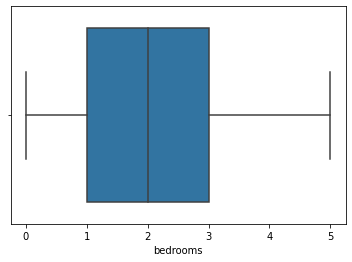

In [8]:
sns.boxplot(data = data_sigma, x = "bedrooms")

Vemos en el grafico de caja y bigote que tras la aplicacion de la regla de 3 sigmas, ya no se ven outliers.

In [9]:
data_sigma = sigma_filter(data,"surface_total")
data_sigma.shape

(146329, 19)

<AxesSubplot:xlabel='surface_total'>

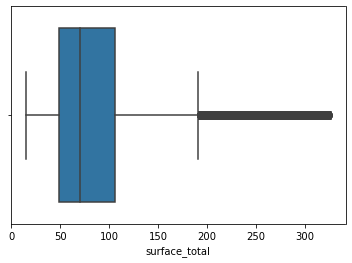

In [8]:
sns.boxplot(data = data_sigma, x = "surface_total")

Vemos en el grafico de caja y bigote que tras la aplicacion de la regla de 3 sigmas, la reduccion de los outliers.

In [7]:
data_sigma = sigma_filter(data,"surface_covered")
data_sigma.shape

(79791, 9)

<AxesSubplot:xlabel='surface_covered'>

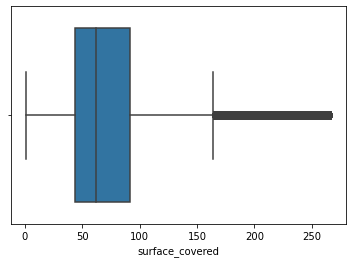

In [10]:
sns.boxplot(data = data_sigma, x = "surface_covered")

Aqui vemos lo mismo que en el grafico anterior

In [8]:
data_sigma = sigma_filter(data,"bathrooms")
data_sigma.shape

(80828, 9)

<AxesSubplot:xlabel='bathrooms'>

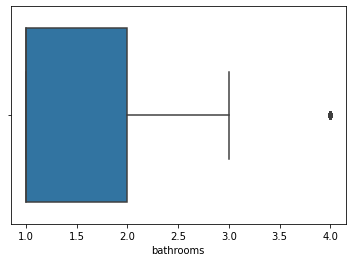

In [12]:
sns.boxplot(data = data_sigma, x = "bathrooms")

Nuevamente lo mismo, se reducen los outliers en menor proporcion que antes.

In [9]:
data_sigma = sigma_filter(data,"rooms")
data_sigma.shape

(80362, 9)

<AxesSubplot:xlabel='rooms'>

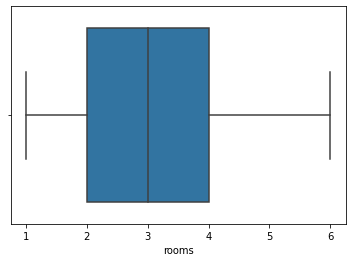

In [14]:
sns.boxplot(data = data_sigma, x = "rooms")

Por ultimo, aplicamos este tratamiento a nuestra ultima variable predictora "rooms".

<function matplotlib.pyplot.show(close=None, block=None)>

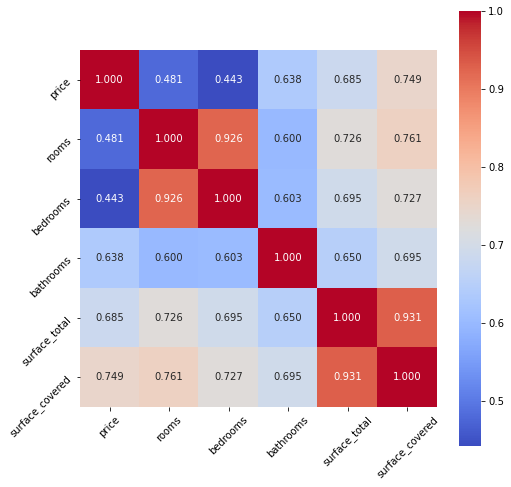

In [10]:
corr1 = data.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr1,cbar = True, square = True, annot = True, fmt = ".3f", annot_kws={"size":10}, cmap  = "coolwarm")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show

Vemos la correlaciones entre las variables como lo hicimos en el proyecto1

In [8]:
data_1 = data.copy()

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [18]:
data_encode = data_1[["l3"]]

In [19]:
one = OneHotEncoder(handle_unknown = "ignore")
data_encode = pd.DataFrame(one.fit_transform(data_encode).toarray())

Aplicamos One hot encoder para utilizar estas dos variables como predictoras, transformandolas en numeros para que nuestro modelo las pueda utilizar.

In [20]:
data_encode.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data_1.isna().sum()

NameError: name 'data_1' is not defined

Cuantos valores nulos tenemos?

In [22]:
data_1.drop(["l3","property_type","title","price","surface_covered"],axis = 1,inplace = True)


Dropeamos las variables que no vamos a escalar.

In [23]:
data_1.head()

,rooms,bedrooms,bathrooms,surface_total
0,7.0,7.0,2.0,140.0
1,2.0,1.0,2.0,70.0
2,2.0,1.0,1.0,45.0
3,2.0,1.0,1.0,85.0
5,2.0,1.0,1.0,56.0


Escalamos los datos para poder imputar nuestros valores null

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
data_escaled = pd.DataFrame(scaler.fit_transform(data_1),columns = data_1.columns)
data_escaled

,rooms,bedrooms,bathrooms,surface_total
0,3.081643,4.787409,0.525253,0.580170
1,-0.773705,-0.955076,0.525253,-0.327178
2,-0.773705,-0.955076,-0.650632,-0.651231
3,-0.773705,-0.955076,-0.650632,-0.132746
4,-0.773705,-0.955076,-0.650632,-0.508648
...,...,...,...,...
81617,0.768434,0.959086,1.701138,1.033843
81618,-0.002636,0.002005,0.525253,0.632018
81619,0.768434,0.002005,0.525253,2.874463
81620,-0.002636,0.002005,0.525253,0.644980


Aplicamos un escalado de datos para imputar valores faltantes con KNNImputer(Esto predice nuestros valores faltantes de nuestro data set)

In [27]:
from sklearn.impute import KNNImputer

In [28]:
imputer =  KNNImputer(n_neighbors = 5)

Le indicamos la cantidad de vecinos

In [29]:
data_imputed = pd.DataFrame(imputer.fit_transform(data_escaled),columns = data_1.columns)
data_imputed

,rooms,bedrooms,bathrooms,surface_total
0,3.081643,4.787409,0.525253,0.580170
1,-0.773705,-0.955076,0.525253,-0.327178
2,-0.773705,-0.955076,-0.650632,-0.651231
3,-0.773705,-0.955076,-0.650632,-0.132746
4,-0.773705,-0.955076,-0.650632,-0.508648
...,...,...,...,...
81617,0.768434,0.959086,1.701138,1.033843
81618,-0.002636,0.002005,0.525253,0.632018
81619,0.768434,0.002005,0.525253,2.874463
81620,-0.002636,0.002005,0.525253,0.644980


Ya no tenemos valores faltantes en nuestro dataset.

In [30]:
data_imputed.isna().sum()

rooms            0
bedrooms         0
bathrooms        0
surface_total    0
dtype: int64

Refrescamos los resultados de los modelos del primer proyecto

Modelo: Árbol de Decisión Proyecto 1
Raíz del error cuadrático medio en Train: 167227.41628580372
Raíz del error cuadrático medio en Test: 174937.55658217394

Modelo: Vecinos más cercanos Proyecto 1
Raíz del error cuadrático medio en Train: 139627.08608090735
Raíz del error cuadrático medio en Test: 168845.85024146654

Modelo: Vecinos más cercanos Proyecto 1
Raíz del error cuadrático medio en Train: 139627.08608090735
Raíz del error cuadrático medio en Test: 168845.85024146654

Entrenamos los 3 modelos del proyecto 1 con el tratamiento de los datos con las mismas variables predictoras

In [31]:
from sklearn.model_selection import train_test_split

X = data_imputed
y = data.price
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57135, 4) (57135,) (24487, 4) (24487,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [33]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)

In [34]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor()

Modelo: Regresión lineal benchmark
Raíz del error cuadrático medio en Train: 199935.79942782654
Raíz del error cuadrático medio en Test: 201565.49065956168


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


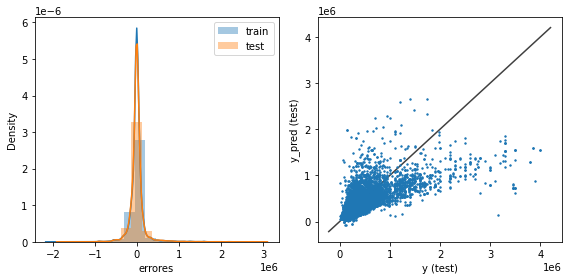

Modelo: Árbol de Decisión
Raíz del error cuadrático medio en Train: 165813.90124814774
Raíz del error cuadrático medio en Test: 173082.0946788966


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


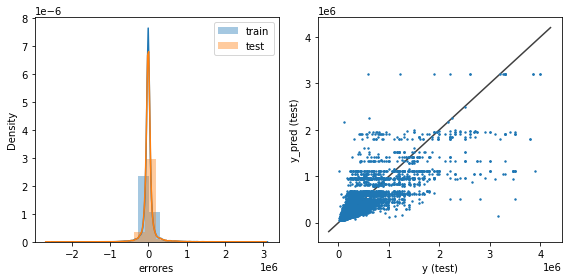

Modelo: Vecinos más cercanos
Raíz del error cuadrático medio en Train: 138970.8178974687
Raíz del error cuadrático medio en Test: 157159.95201376002


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


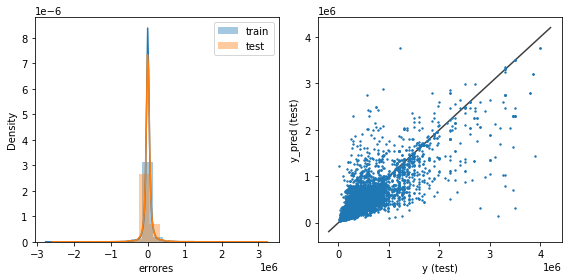

In [35]:
modelos = ['Regresión lineal benchmark', 'Árbol de Decisión', 'Vecinos más cercanos']

for i, model in enumerate([linear_model, tree_regressor, knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing


In [38]:
X = data_imputed.join(data_encode)

X.head()

,rooms,bedrooms,bathrooms,surface_total,0,1,2,3,4,5,...,47,48,49,50,51,52,53,54,55,56
0,3.081643,4.787409,0.525253,0.580170,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.773705,-0.955076,0.525253,-0.327178,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.773705,-0.955076,-0.650632,-0.651231,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.773705,-0.955076,-0.650632,-0.132746,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.773705,-0.955076,-0.650632,-0.508648,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
X.filter(["rooms","bathrooms","surface_total"])
X.describe()

,rooms,bedrooms,bathrooms,surface_total,0,1,2,3,4,5,...,47,48,49,50,51,52,53,54,55,56
count,8.162200e+04,8.162200e+04,81622.000000,8.162200e+04,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,...,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000,81622.000000
mean,1.894270e-16,-1.002849e-16,0.000641,1.253561e-17,0.005011,0.001874,0.083654,0.029367,0.008368,0.038213,...,0.005758,0.006310,0.003063,0.008147,0.001580,0.000478,0.003724,0.000796,0.035946,0.015204
std,1.000006e+00,1.000006e+00,0.999583,1.000006e+00,0.070611,0.043255,0.276870,0.168834,0.091093,0.191711,...,0.075665,0.079182,0.055259,0.089895,0.039724,0.021854,0.060915,0.028209,0.186157,0.122365
min,-1.544775e+00,-1.912156e+00,-0.650632,-1.040094e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.737053e-01,-9.550756e-01,-0.650632,-5.993824e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.635667e-03,2.005107e-03,-0.650632,-3.142159e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.684339e-01,9.590858e-01,0.525253,1.913063e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.773197e+01,1.244405e+01,14.635874,1.172758e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
X.shape

(81622, 61)

In [41]:
y = data["price"]

In [42]:
y.head()

0    153000.0
1    159000.0
2    125000.0
3    295000.0
5    150000.0
Name: price, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57135, 61) (57135,) (24487, 61) (24487,)


In [44]:
linear_model = LinearRegression()
tree_regressor = DecisionTreeRegressor(max_depth=7, random_state=42)
knn_regressor = KNeighborsRegressor(n_neighbors=5)
xgb_reg = xgb.XGBRegressor(n_estimators=100, max_depth=15, colsample_bytree = 1.0, learning_rate = 0.3)

In [45]:
linear_model.fit(X_train, y_train)
tree_regressor.fit(X_train, y_train)
knn_regressor.fit(X_train, y_train)
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:291175.78125	validation_1-rmse:293134.00000
[1]	validation_0-rmse:217594.28125	validation_1-rmse:222794.92188
[2]	validation_0-rmse:166661.73438	validation_1-rmse:177168.39062
[3]	validation_0-rmse:132036.00000	validation_1-rmse:148185.57812
[4]	validation_0-rmse:107387.17188	validation_1-rmse:129175.64844
[5]	validation_0-rmse:90929.67188	validation_1-rmse:117955.97656
[6]	validation_0-rmse:79795.38281	validation_1-rmse:111600.22656
[7]	validation_0-rmse:72201.88281	validation_1-rmse:107914.03125
[8]	validation_0-rmse:66907.49219	validation_1-rmse:105798.13281
[9]	validation_0-rmse:63343.67188	validation_1-rmse:104663.68750
[10]	validation_0-rmse:60765.47656	validation_1-rmse:104269.82031
[11]	validation_0-rmse:59082.23047	validation_1-rmse:103978.67188
[12]	validation_0-rmse:57951.94141	validation_1-rmse:103680.92969
[13]	validation_0-rmse:56977.40234	validation_1-rmse:103585.03906
[14]	validation_0-rmse:56318.85938	validation_1-rmse:103375.95312
[15]	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Aplicamos un nuevo modelo "XGBoosting"

Modelo: Regresión lineal benchmark optimizazdo
Raíz del error cuadrático medio en Train: 178274.35121687793
Raíz del error cuadrático medio en Test: 180621.78270728007


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


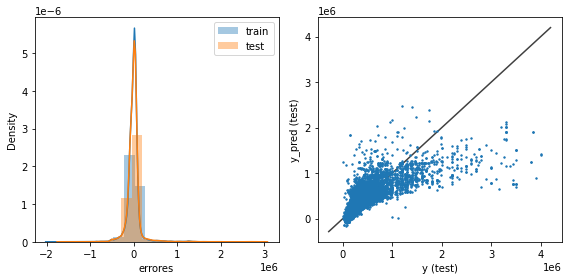

In [46]:
from sklearn.metrics import mean_squared_error
modelos = ['Regresión lineal benchmark optimizazdo']

for i, model in enumerate([linear_model]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Modelo: Árbol de Decisión optimizado
Raíz del error cuadrático medio en Train: 136172.96001169173
Raíz del error cuadrático medio en Test: 146643.9965114514


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


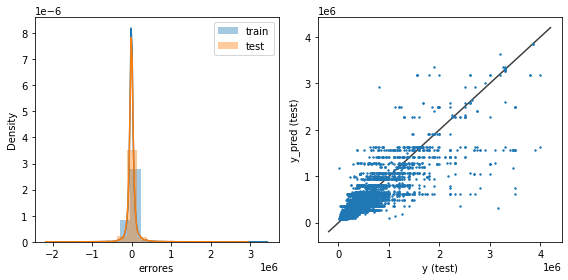

In [47]:
from sklearn.metrics import mean_squared_error
modelos = ['Árbol de Decisión optimizado']

for i, model in enumerate([tree_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Conclusion errores: Vemos que no hay diferencias en el conjunto de test y train, con lo cual significa que la varianza es baja

Modelo: Vecinos más cercanos optimizado
Raíz del error cuadrático medio en Train: 100555.23828110602
Raíz del error cuadrático medio en Test: 121888.78082328611


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


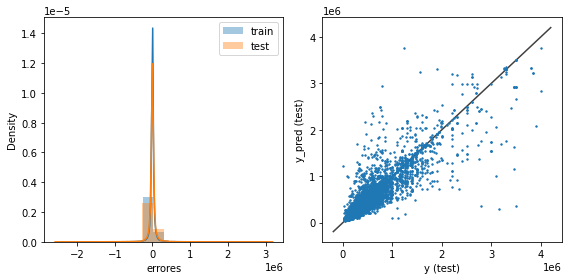

In [48]:
from sklearn.metrics import mean_squared_error
modelos = ['Vecinos más cercanos optimizado']

for i, model in enumerate([knn_regressor]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Conclusion errores: Vemos que no hay diferencias en el conjunto de test y train, con lo cual significa que la varianza es baja

Modelo: XGBoost
Raíz del error cuadrático medio en Train: 46391.538571001765
Raíz del error cuadrático medio en Test: 103714.76370746782


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


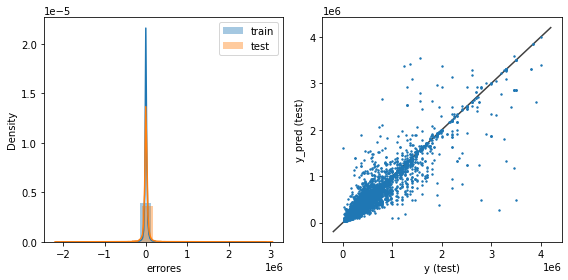

In [49]:
from sklearn.metrics import mean_squared_error
modelos = ["XGBoost"]

for i, model in enumerate([xgb_reg]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Interpretacion de errores: Vemos que en el conjunto de train y Test hay un poco mas de diferencia frente a los modelos anteriores, en este caso hay un nivel de varianza mas elevado, aun asi en ninguno de los modelos anteriores detectamos overfitting

Ahora justificamos la eleccion de los hiperparametros, para eso vamos a usar gridsearch.

In [50]:
from sklearn.model_selection import GridSearchCV
parameters = {
                "learning_rate":[0.05, 0.15, 0.30],
                "max_depth":[10,12,13],
                "colsample_bytree":[0.7, 1.0],
                "n_estimators":[100],
}

xgb_grid = GridSearchCV(xgb.XGBRFRegressor(),
                        parameters,
                        cv = 5,
                        verbose = True)

xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      colsample_bylevel=None,
                                      colsample_bytree=None, gamma=None,
                                      gpu_id=None, importance_type='gain',
                                      interaction_constraints=None,
                                      max_delta_step=None, max_depth=None,
                                      min_child_weight=None, missing=nan,
                                      monotone_constraints=None,
                                      n_estimators=100, n_jobs=None,
                                      num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=None, reg_alpha=None,
                                      scale_pos_weight=None, tree_method=None,
                                      validate_parameters=None,
     

Si bien Gridsearch nos dice que la cantidad de arboles que obtendra el mejor resultado es 100, veremos mas abajo que no hay mucha diferencia con 15 arboles, con lo cual utilizar ambos hiperparametros obtendria resultados similares

In [51]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.06762047270840713
{'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 13, 'n_estimators': 100}


In [52]:
#xgb_reg.get_booster().get_score(importance_type="gain")

Variables mas importantes en nuestro dataset

<AxesSubplot:>

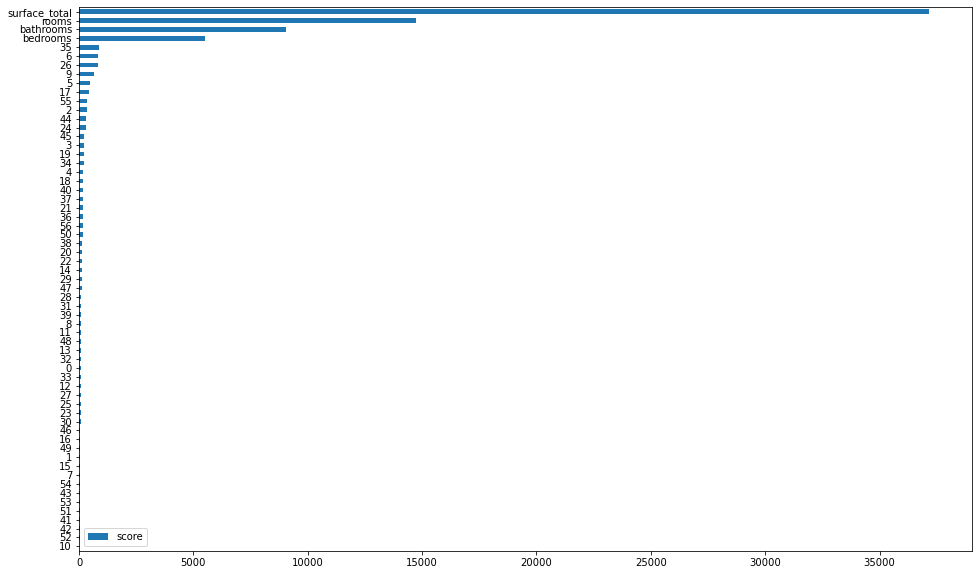

In [53]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

X = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
X.plot(figsize = (16,10), kind='barh')

Vemos que la variable mas importante de nuestras variables predictoras es "Surface_total", la que mas nos va ayudar a predecir el precio

<AxesSubplot:>

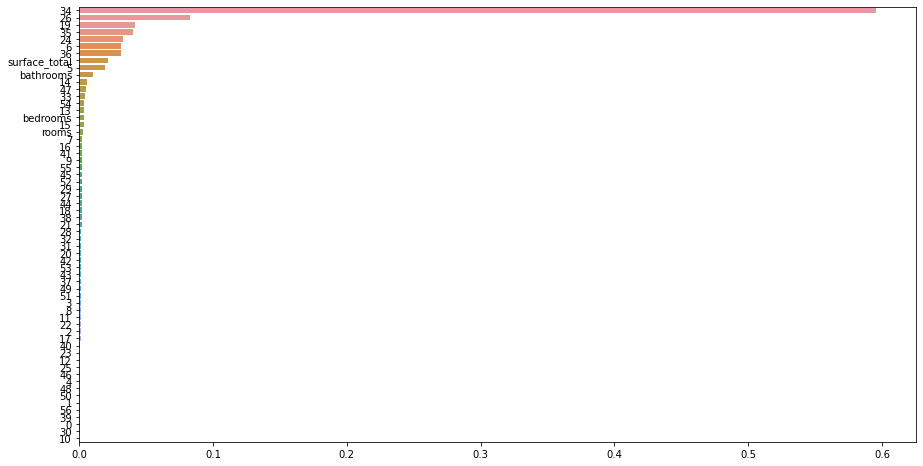

In [54]:
importances=xgb_reg.feature_importances_
columns=X_train.columns
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(15,8))
sns.barplot(y = columns[indices],x=importances[indices])

In [55]:
evals_results = xgb_reg.evals_result()

La variable mas importante en nuestro modelo de XGBoost es el barrio 34, tambien tiene sentido que dentro las variables importantes encontremos a surface_total

Text(0.5, 0, 'Número de árboles')

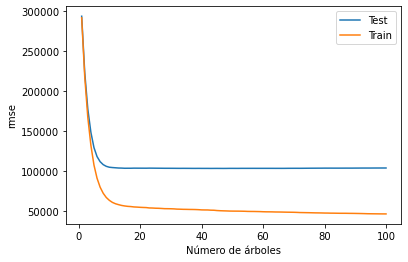

In [56]:
error_test = []
error_train = []

for prediccion_test in evals_results['validation_1']['rmse']:
    error_test.append(prediccion_test)
    
for prediccion_train in evals_results['validation_0']['rmse']:    
    error_train.append(prediccion_train)
    
plt.plot(range(1, len(error_test) + 1), error_test, label = 'Test')
plt.plot(range(1, len(error_test) + 1), error_train, label = 'Train')
plt.legend()
plt.ylabel('rmse')
plt.xlabel('Número de árboles')

Entendemos que el rendimiento del modelo se estabiliza en aproximadamente 15 arboles

Probemos y experimentemos que diferencias encontramos con 15 y 100 arboles, recordemos que 100 arboles es lo que habiamos obtenido de haber aplicado gridsearch

In [57]:
xgb_reg = xgb.XGBRegressor(n_estimators=15, max_depth=15, colsample_bytree = 1.0, learning_rate = 0.3)

In [58]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)])

[0]	validation_0-rmse:291175.78125	validation_1-rmse:293134.00000
[1]	validation_0-rmse:217594.28125	validation_1-rmse:222794.92188
[2]	validation_0-rmse:166661.73438	validation_1-rmse:177168.39062
[3]	validation_0-rmse:132036.00000	validation_1-rmse:148185.57812
[4]	validation_0-rmse:107387.17188	validation_1-rmse:129175.64844
[5]	validation_0-rmse:90929.67188	validation_1-rmse:117955.97656
[6]	validation_0-rmse:79795.38281	validation_1-rmse:111600.22656
[7]	validation_0-rmse:72201.88281	validation_1-rmse:107914.03125
[8]	validation_0-rmse:66907.49219	validation_1-rmse:105798.13281
[9]	validation_0-rmse:63343.67188	validation_1-rmse:104663.68750
[10]	validation_0-rmse:60765.47656	validation_1-rmse:104269.82031
[11]	validation_0-rmse:59082.23047	validation_1-rmse:103978.67188
[12]	validation_0-rmse:57951.94141	validation_1-rmse:103680.92969
[13]	validation_0-rmse:56977.40234	validation_1-rmse:103585.03906
[14]	validation_0-rmse:56318.85938	validation_1-rmse:103375.95312


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=15, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

Modelo: XGBoost
Raíz del error cuadrático medio en Train: 56318.918559131256
Raíz del error cuadrático medio en Test: 103375.97716230543


C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Marcos\.conda\envs\datascience\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


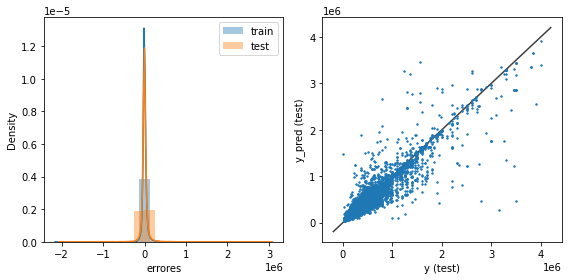

In [59]:
from sklearn.metrics import mean_squared_error
modelos = ["XGBoost"]

for i, model in enumerate([xgb_reg]):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(f'Modelo: {modelos[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (8,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()

Vemos que con 15 arboles la diferencia del RMSE no es muy significativa, con lo cual podriamos optimizar nuestro arbol y tendriamos excelentes resultados con solo 15 arboles.

Conclusion final 

A partir de un preprocesamiento de datos con previo escalado e imputacion con KNN imputer pudimos darle mejor rendimiento y potencialidad a nuestros features, asimismo como el tratamiento de sigmas a los outliers de las variables, logramos mejorar los resultados del proyecto 1, simplemente optimizando las mismas features.


Agregando nuevas variables al dataset con el encoding de la variable l3, nos brindo enriquecimiento para nuestro modelo XGBoost.

Dentro de la aplicacion de un modelo mucho mas avanzado que los anteriores, XGBoost nos dio los resultados que esperabamos, buscabamos como objetivo principal disminuir aun mas lo errores de los modelos anteriores, la aplicacion de gridsearch nos ayudo a encontrar los mejores hiperparametros del modelo, pero pudimos obtener resultados similares a partir del grafico del error la cantidad de arboles suficientes para alcanzar buenos resultados.Quizas estaria bueno probar resultados con randomsearch para un proximo proyecto

En sintesis, alcanzamos y validamos la hipotesis del proyecto que se basaba en mejorar nuestros resultados con lo mencionado anteriormente.

.

.

.

Desafio Opcional Clustering:(Experimentando)Agradezco sugerencias.

In [60]:
data_2 = data.copy()
data_2.head()

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3,title
0,153000.0,7.0,7.0,2.0,140.0,140.0,Departamento,San Cristobal,"***Venta semipiso centro, ideal hostel*****"
1,159000.0,2.0,1.0,2.0,70.0,58.0,PH,Boedo,Espectacular PH reciclado en Boedo sin expensas.
2,125000.0,2.0,1.0,1.0,45.0,45.0,PH,Palermo,Depto.tipo casa de 2 ambientes en Venta en Pal...
3,295000.0,2.0,1.0,1.0,85.0,50.0,PH,Palermo,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...
5,150000.0,2.0,1.0,1.0,56.0,56.0,PH,Villa Crespo,Depto.tipo casa de 2 ambientes en Venta en Vil...


In [61]:
data_2.drop(["property_type","title","price","surface_covered","bedrooms",],axis = 1,inplace = True)

In [62]:
from sklearn.preprocessing import LabelEncoder
data_encode2=data_2.filter(["l3"])
data_encode2=data_2.apply(LabelEncoder().fit_transform)
data_encode2.head()

,rooms,bathrooms,surface_total,l3
0,6,1,125,38
1,1,1,55,8
2,1,0,30,26
3,1,0,70,26
5,1,0,41,44


In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [64]:
X = np.array(data_encode2[["surface_total","rooms","bathrooms"]])
y = np.array(data_encode2["l3"])
X.shape

(81622, 3)

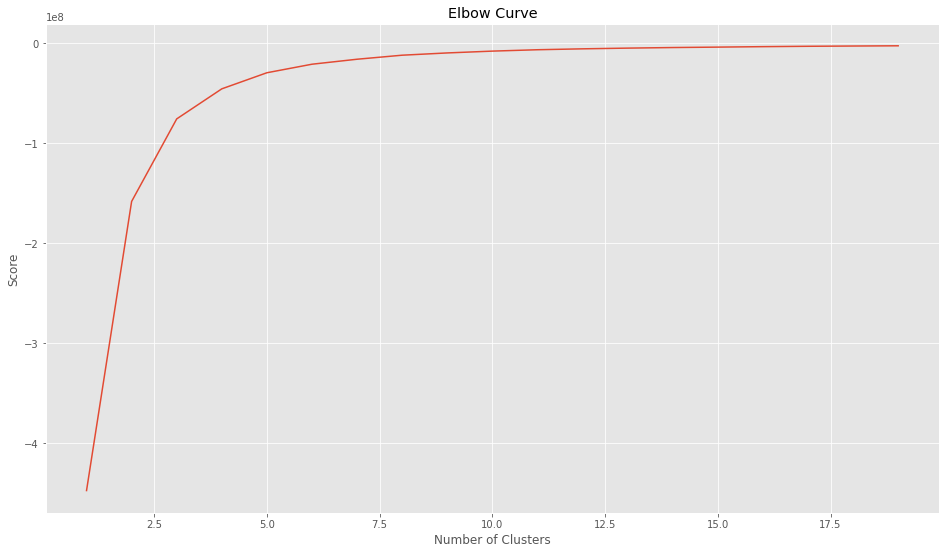

In [65]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


Entendemos nuestro numero de clusters ideales para nuestro modelo k-means

In [66]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[7.52389006e+01 2.32191374e+00 7.33494396e-01]
 [1.42476076e+02 3.17771084e+00 1.39079174e+00]
 [4.14432864e+02 4.96035806e+00 2.47890026e+00]
 [3.36144898e+01 1.12280612e+00 2.45051020e-01]
 [2.48238656e+02 4.05640511e+00 1.96766107e+00]]


Entrenamos nuestros centroides para crear los clusters

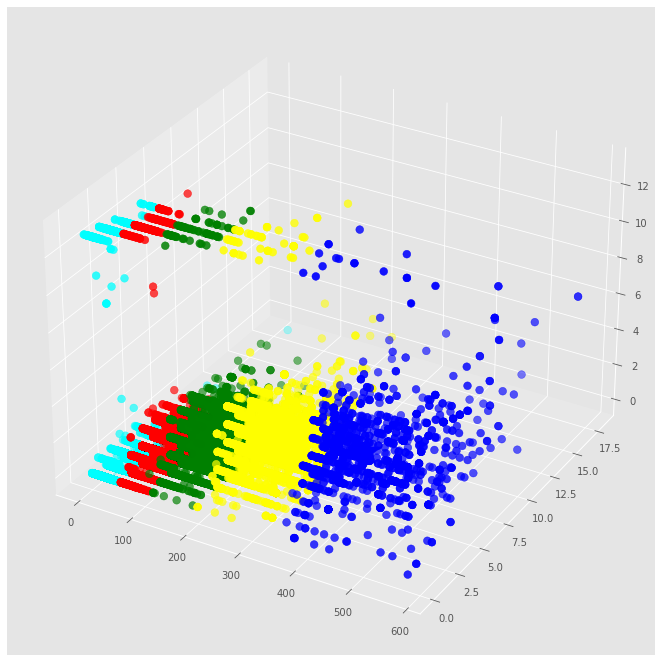

In [67]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

-------------------------------------------------------------------------------------------------------------

<font size = 5>Proyecto 4 </font>

<font size = 5>El Objetivo es abordar otro tipo de analisis/problema, lo que vamos a probar es un nuevo modelo dentro de la topologia de NLP(Procesamiento de lenguaje natural), en este caso vamos abordar el problema con la libreria Topic Modelling de nltk con una tecncia de LDA, precisamente lo que vamos a buscar es crear un cluster a partir de las palabras de la columna title, poder ofrecer recomendaciones de propiedades y aprovechar esta variable.</font>

In [2]:
import nltk
import itertools
# Esto sirve para configurar NLTK. La primera vez puede tardar un poco
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marcos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marcos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
data_nlp = data.copy()
data_nlp.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [31]:
data_nlp.drop(["price","rooms","bedrooms","bathrooms","surface_total","surface_covered","l3","property_type"],axis=1, inplace=True)

In [32]:
data_nlp.head()

,start_date,end_date,created_on,lat,lon,l1,l2,currency,title,description,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,Venta


In [33]:
index_random = np.random.randint(0,high = data_nlp.shape[0])
titular = data_nlp.iloc[index_random].title
print(index_random, titular)

46648 Duplex tipo departamento!!


Vamos a tener que convertir la columna en un string, para que podamos tokenizar

In [34]:
data_nlp['title']=data_nlp['title'].apply(str)

In [35]:
data_nlp['title'] = data_nlp['title'].fillna('').apply(str)

In [36]:
data_nlp.isna().sum()

start_date           0
end_date             0
created_on           0
lat               9925
lon               9959
l1                   0
l2                   0
currency             0
title                0
description          0
operation_type       0
dtype: int64

Para tokenizar primero es necesario entender frente a que tipo de dato estamos.

In [37]:
data_nlp.dtypes

start_date         object
end_date           object
created_on         object
lat               float64
lon               float64
l1                 object
l2                 object
currency           object
title              object
description        object
operation_type     object
dtype: object

Como el tipo de dato es un objeto, convertimos a string con pandas para poder tokenizar este dato.

In [38]:
data_nlp = str(data_nlp)
data_nlp

'        start_date    end_date  created_on        lat        lon         l1  \\\n0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   \n1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   \n2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   \n3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   \n4       2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   \n...            ...         ...         ...        ...        ...        ...   \n146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   \n146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   \n146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   \n146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   \n146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   \n\n                              l2 cur

In [39]:
title = data_nlp

Aplicamos tokenizacion

In [40]:
title_st = nltk.tokenize.sent_tokenize(data_nlp)
title_st

['        start_date    end_date  created_on        lat        lon         l1  \\\n0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   \n1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   \n2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   \n3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   \n4       2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   \n...            ...         ...         ...        ...        ...        ...   \n146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   \n146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   \n146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   \n146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   \n146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   \n\n                              l2 cu

Indicamos "las stop words" y revisamos si es necesario sacar alguna

In [41]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords = [palabra for palabra in stopwords if 'not' not in palabra]
stopwords

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [27]:
freq = nltk.FreqDist(title_st)
freq

FreqDist({'G.B.A.': 6, '        start_date    end_date  created_on        lat        lon         l1  \\\n0       2019-10-17  2019-12-23  2019-10-17 -34.605880 -58.384949  Argentina   \n1       2019-10-17  2019-11-21  2019-10-17 -34.624056 -58.412110  Argentina   \n2       2019-10-17  2019-11-01  2019-10-17 -34.593569 -58.427474  Argentina   \n3       2019-10-17  2019-12-23  2019-10-17 -34.581294 -58.436754  Argentina   \n4       2019-10-17  2020-03-11  2019-10-17 -34.914194 -57.938219  Argentina   \n...            ...         ...         ...        ...        ...        ...   \n146655  2019-07-31  2019-08-13  2019-07-31 -34.816348 -58.181963  Argentina   \n146656  2019-07-31  2019-08-14  2019-07-31 -34.446459 -58.937810  Argentina   \n146657  2019-07-31  2019-08-14  2019-07-31 -34.444633 -58.981606  Argentina   \n146658  2019-07-31  2019-08-14  2019-07-31 -34.444830 -58.981796  Argentina   \n146659  2019-07-31  2019-10-12  2019-07-31 -34.444760 -58.981885  Argentina   \n\n             

In [36]:
filtrar = []
if True:
    filtrar.append("u")
    filtrar.append("new")

In [55]:
data_nlp2 = data.copy()

In [56]:
data_nlp2.head()

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3,title
0,153000.0,7.0,7.0,2.0,140.0,140.0,Departamento,San Cristobal,"***Venta semipiso centro, ideal hostel*****"
1,159000.0,2.0,1.0,2.0,70.0,58.0,PH,Boedo,Espectacular PH reciclado en Boedo sin expensas.
2,125000.0,2.0,1.0,1.0,45.0,45.0,PH,Palermo,Depto.tipo casa de 2 ambientes en Venta en Pal...
3,295000.0,2.0,1.0,1.0,85.0,50.0,PH,Palermo,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...
5,150000.0,2.0,1.0,1.0,56.0,56.0,PH,Villa Crespo,Depto.tipo casa de 2 ambientes en Venta en Vil...


In [57]:
data_nlp2['title'][350]

'Amplio 2 amb c/terraza propia, parrilla, cochera!'

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(data_nlp2['title'].values.astype('U'))

In [62]:
doc_term_matrix

<81622x4632 sparse matrix of type '<class 'numpy.int64'>'
	with 501898 stored elements in Compressed Sparse Row format>

In [63]:
from sklearn.decomposition import LatentDirichletAllocation
#indicamos numeros de clusters
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(n_components=5, random_state=42)

In [64]:
import random

for i in range(10):
    random_id = random.randint(0,len(count_vect.get_feature_names()))
    print(count_vect.get_feature_names()[random_id])

chacabuco
bcón
4d
2193
liberty
mir
4570
40mt2
pensión
escuchan


In [65]:
first_topic = LDA.components_[0]

In [67]:
top_topic_words = first_topic.argsort()[-10:]

In [68]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

centenario
ph
apto
san
000
av
federal
capital
parque
venta


In [69]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['centenario', 'ph', 'apto', 'san', '000', 'av', 'federal', 'capital', 'parque', 'venta']


Top 10 words for topic #1:
['villa', 'cochera', 'monoambiente', 'patio', 'estrenar', 'ambientes', 'terraza', 'venta', 'ph', 'amb']


Top 10 words for topic #2:
['vista', 'excelente', 'dependencia', 'palermo', 'piso', 'recoleta', 'ambientes', 'venta', 'amb', 'cochera']


Top 10 words for topic #3:
['oportunidad', 'profesional', 'departamento', 'muy', 'excelente', 'luminoso', 'apto', 'frente', 'al', 'ambientes']


Top 10 words for topic #4:
['depto', 'casa', 'crespo', 'almagro', 'palermo', 'villa', 'ambientes', 'departamento', 'venta', 'en']




In [70]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(81622, 5)

In [71]:
data_nlp2['Topic'] = topic_values.argmax(axis=1)

In [72]:
data_nlp2.head()

,price,rooms,bedrooms,bathrooms,surface_total,surface_covered,property_type,l3,title,Topic
0,153000.0,7.0,7.0,2.0,140.0,140.0,Departamento,San Cristobal,"***Venta semipiso centro, ideal hostel*****",3
1,159000.0,2.0,1.0,2.0,70.0,58.0,PH,Boedo,Espectacular PH reciclado en Boedo sin expensas.,1
2,125000.0,2.0,1.0,1.0,45.0,45.0,PH,Palermo,Depto.tipo casa de 2 ambientes en Venta en Pal...,4
3,295000.0,2.0,1.0,1.0,85.0,50.0,PH,Palermo,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,0
5,150000.0,2.0,1.0,1.0,56.0,56.0,PH,Villa Crespo,Depto.tipo casa de 2 ambientes en Venta en Vil...,4


Basicamente lo que hicimos es clusterizar a partir de la columna title con una tecnica de LDA de topic modelling, permitio agrupar por palabras tomando el campo title, la descripciones parecidas tienen un topic, esto podria ayudar a recomendar distintos tipos de departamentos dependiendo lo que las personas buscan al buscar propiedades en properatti

4    33861
1    14585
2    13233
3    11828
0     8115
Name: Topic, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Topic'>

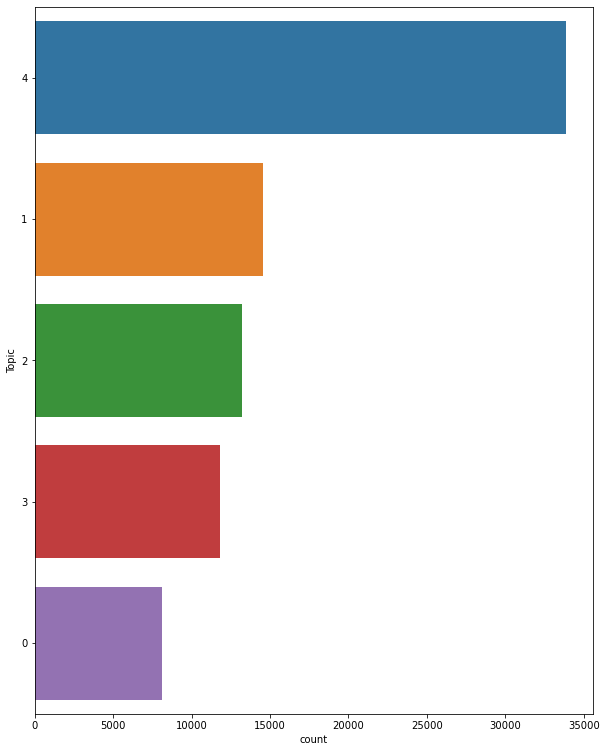

In [75]:
print(data_nlp2["Topic"].value_counts())
plt.figure(figsize=(10,13))
descending_order = data_nlp2['Topic'].value_counts().sort_values(ascending=False).index
sns.countplot(data = data_nlp2, y = "Topic",order = descending_order)

Aca podemos tener una dimension del cluster y como agrupo el contenido

<font size = 5>Basicamente lo que hicimos es clusterizar a partir de la columna title con una tecnica de LDA de topic modelling, permitio agrupar por palabras tomando el campo title, la descripciones parecidas tienen un topic, esto podria ayudar a recomendar distintos tipos de departamentos dependiendo lo que las personas buscan al buscar propiedades en properatti</font>